# TP Pandas — Corrigé (Dataset Iris)

Ce corrigé charge le dataset Iris via scikit-learn, réalise des manipulations pandas et génère des graphiques **avec matplotlib uniquement**.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(type(iris))
df = iris.frame.copy()

print(df.columns)

df['species'] = [iris.target_names[k] for k in iris.target]

df = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "species"]]
df.head()


<class 'sklearn.utils._bunch.Bunch'>
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:

print("Shape:", df.shape)
print()
print(df.info())
print()
df.describe()


Shape: (150, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:

df = df.rename(columns={
    "sepal length (cm)": "SepalLengthCm",
    "sepal width (cm)": "SepalWidthCm",
    "petal length (cm)": "PetalLengthCm",
    "petal width (cm)": "PetalWidthCm",
    "species": "Species"
})
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:

df["PetalRatio"] = df["PetalLengthCm"] / df["PetalWidthCm"]
df["SepalRatio"] = df["SepalLengthCm"] * df["SepalWidthCm"]
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalRatio,SepalArea,SepalRatio
0,5.1,3.5,1.4,0.2,setosa,7.0,17.85,17.85
1,4.9,3.0,1.4,0.2,setosa,7.0,14.70,14.70
2,4.7,3.2,1.3,0.2,setosa,6.5,15.04,15.04
3,4.6,3.1,1.5,0.2,setosa,7.5,14.26,14.26
4,5.0,3.6,1.4,0.2,setosa,7.0,18.00,18.00


In [ ]:
df = df.drop(columns=["SepalRatio"])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalRatio
0,5.1,3.5,1.4,0.2,setosa,7.00
4,5.0,3.6,1.4,0.2,setosa,7.00
5,5.4,3.9,1.7,0.4,setosa,4.25
7,5.0,3.4,1.5,0.2,setosa,7.50
10,5.4,3.7,1.5,0.2,setosa,7.50


In [16]:

df = df[df["SepalLengthCm"] >= 5.0]
df.shape


(128, 6)

In [17]:

df_setosa = df[df["Species"] == "setosa"]
df_setosa.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalRatio
0,5.1,3.5,1.4,0.2,setosa,7.00
4,5.0,3.6,1.4,0.2,setosa,7.00
5,5.4,3.9,1.7,0.4,setosa,4.25
7,5.0,3.4,1.5,0.2,setosa,7.50
10,5.4,3.7,1.5,0.2,setosa,7.50


In [18]:

counts = df["Species"].value_counts()
counts


Species
versicolor    49
virginica     49
setosa        30
Name: count, dtype: int64

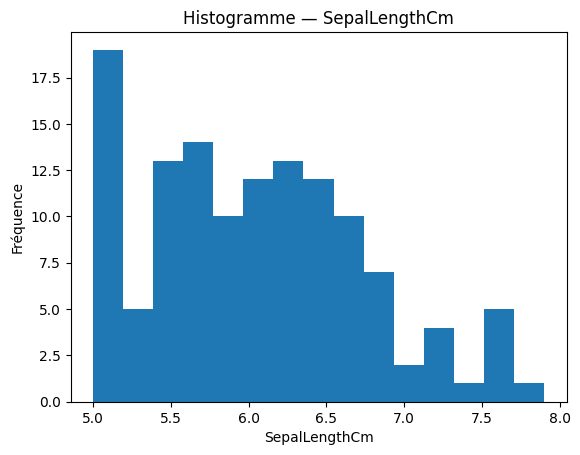

In [ ]:

plt.figure()
plt.hist(df["SepalLengthCm"], bins=15)
plt.title("Histogramme — SepalLengthCm")
plt.xlabel("SepalLengthCm")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()


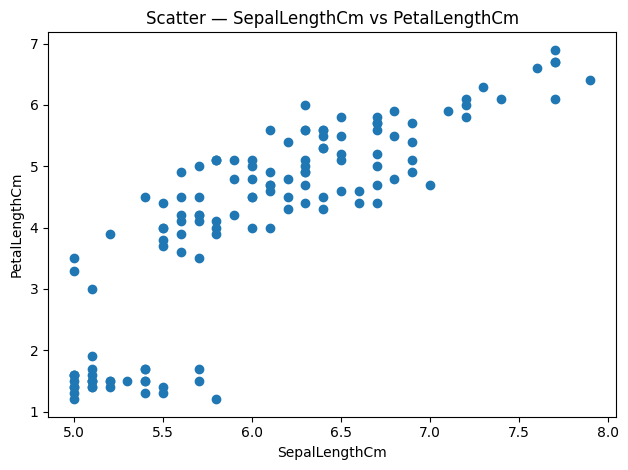

In [20]:

plt.figure()
plt.scatter(df["SepalLengthCm"], df["PetalLengthCm"])
plt.title("Scatter — SepalLengthCm vs PetalLengthCm")
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")
plt.tight_layout()
plt.show()


/var/folders/5w/0w5w6sfn6nsfnyfbnmf3rgtc0000gn/T/ipykernel_13537/4049435101.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_species, labels=species_list)


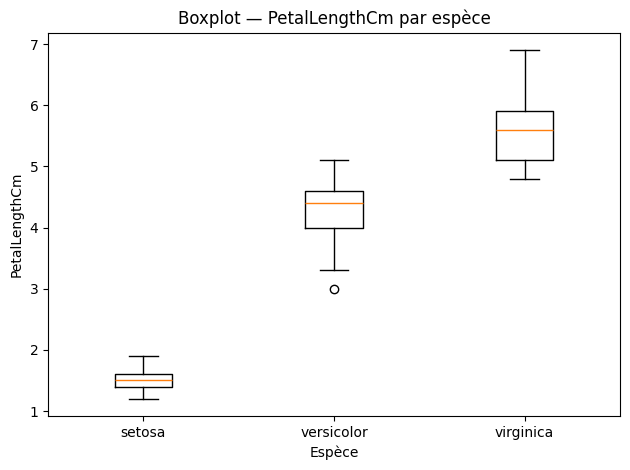

In [28]:

species_list = sorted(df["Species"].unique())
data_by_species = [df[df["Species"] == sp]["PetalLengthCm"].values for sp in species_list]

plt.figure()
plt.boxplot(data_by_species, labels=species_list)
plt.title("Boxplot — PetalLengthCm par espèce")
plt.xlabel("Espèce")
plt.ylabel("PetalLengthCm")
plt.tight_layout()
plt.show()


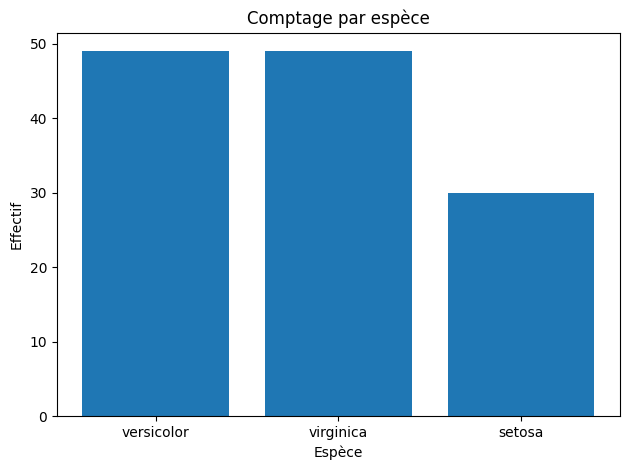

In [29]:

plt.figure()
plt.bar(counts.index, counts.values)
plt.title("Comptage par espèce")
plt.xlabel("Espèce")
plt.ylabel("Effectif")
plt.tight_layout()
plt.show()
